# Imports
---------------

In [1]:
import os

import pandas as pd
pd.options.mode.chained_assignment = None

import datetime as dt
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.context(("seaborn", "ggplot"))
os.chdir('../')

In [2]:
assert os.getcwd() == 'C:\\Users\\Garrett\\OneDrive\\Projects\\TempPred'

# Goal: Predict peak-load on Thursday June 18, 2020 and hour of peak-load
--------------

In [3]:
def plot_dual_tseries(data_df, ts_1, ts_2, ts_1_title, ts_2_title, plot_title):
    
    """
    ==================================================================
    Description:
        - Convenience function for generating consistent dual plots of time series
    --------------
    Inputs:
        - data_df: Dataframe containing the two time series to be plotted
        - ts_1, ts_2: column names from data_df which denote the respective series
        - ts_1_title, ts_2_title: strings to be used as the respective y-axis labels
        - plot_title: string giving the overall plot name
    Outputs:
        - None; plot generated on call
    ---------------
    Notes:
        - data_df index should be set as a Datetime index prior to being passed into the function
            - Should add an assert statement here in future? 
            - Question is how to handle different freq.
    ==================================================================

    """
    
    fig1, ax1 = plt.subplots(figsize = (20, 10))

    ax1.plot(ts_1, data = data_df, color = 'blue', linewidth = 2)
    ax1.tick_params(axis = 'y', labelcolor = 'blue', labelsize = 15)
    
    locator = mdates.AutoDateLocator(minticks=36)
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_tick_params(rotation = 45, labelsize = 15)
    ax1.set_xlim(data_df.index[0], data_df.index[-1])
    ax1.set_ylabel(ts_1_title, fontsize = 20, color = 'blue')

    ax2 = ax1.twinx()
    ax2.plot(ts_2, data = data_df, color = 'red', linewidth = 2)
    ax2.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
    ax2.set_ylabel(ts_2_title, fontsize = 20, color = 'red')
    
    fig1.suptitle(plot_title, fontsize = 25)

    fig1.tight_layout()
    
def plot_annual_loadprofile(data_df, month_num):
        
    """
    ==================================================================
    Description:
        - Generate scatterplot of load vs. temperature annually, colored by peak vs. off-peak periods
    --------------
    Inputs:
        - data_df: Dataframe containing load and temperature data
        - month_num: integer corresponding to the month in question
    Outputs:
        - None; plot generated by call
    ---------------
    Notes:
        - Would refine by altering subplot titles, possibly legend as well
    ==================================================================

    """
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    
    df_tmp = data_df.loc[df['mth'] == month_num]
    month_name = month_names[month_num-1] #Because list is 0 indexed, but month number in df starts at 1

    plt.figure(figsize = (20,10))
    sns.set_context('talk')
    g1 = sns.relplot(data = df_tmp, x = 'temp', y = 'load', 
                     hue = 'on_peak', palette = 'deep', col = 'yr',
                    height = 8, aspect=.75)
        
    g1.set_axis_labels('Temperature (F)', "Load (MW)")
    plt.suptitle(month_name+' Load vs Temperature by Year, Load Type', fontsize = 20)
    plt.tight_layout()    
    
def plot_monthly_loadprofile(data_df):
        
    """
    ==================================================================
    Description:
        - Generate scatterplot of load vs. temperature monthly, colored by peak vs. off-peak periods
    --------------
    Inputs:
        - data_df: Dataframe containing load and temperature data
    Outputs:
        - None; plot generated by call
    ---------------
    Notes:
        - Need to move legend in future
    ==================================================================

    """
    plt.figure(figsize = (20,10))
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

    sns.set_context('talk')
    g2 = sns.relplot(data = data_df, x = 'temp', y = 'load', 
                     hue = 'on_peak', palette = 'deep', col = 'mth', col_wrap = 4,
                    height = 8, aspect=.75)

    for n in g2.axes_dict.keys():
        tmp = g2.axes_dict[n]
        mth = month_names[n-1]
        tmp.set_title(mth, fontsize = 20)

    g2.set_axis_labels('Temperature (F)', "Load (MW)")
    plt.suptitle('Load vs Temperature by Month, Load Type', fontsize = 20)
    plt.tight_layout()  
    
def plot_dayofweek_loadprofile(data_df, month_num):
        
    """
    ==================================================================
    Description:
        - Generate scatterplot and violinplots of load vs. temperature daily
    --------------
    Inputs:
        - data_df: Dataframe containing load and temperature data
        - month_num: integer corresponding to the month in question
    Outputs:
        - None; plot generated by call
    ---------------
    Notes:
        - Need to move legend in future
    ==================================================================

    """
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    df_tmp = data_df.loc[df['mth'] == month_num]
    month_name = month_names[month_num-1] #Because list is 0 indexed, but month number in df starts at 1

    
    plt.figure(figsize = (20,10))
    sns.set_context('talk')
    g3 = sns.relplot(data = df_tmp, x = 'temp', y = 'load', 
                     hue = 'on_peak', palette = 'deep', col = 'dow',
                    height = 8, aspect=.75, col_wrap = 4)
    
    for n in range(len(g3.axes_dict.keys())):
        g3.axes_dict[n].set_title(day_names[n], fontsize = 20)
    
    g3.set_axis_labels('Temperature (F)', "Load (MW)")
    plt.suptitle(month_name+' Load vs Temperature by Day of Week, Load Type', fontsize = 20)
    plt.tight_layout()
    
    plt.figure(figsize = (20,10))
    sns.set_context('talk')
    g4 = sns.violinplot(data = df_tmp, x = 'dow', y = 'load', hue = 'on_peak', split = True, inner = 'quart')

    plt.suptitle(month_name+' Load Distribution by Day of Week, Load Type', fontsize = 20)
    g4.set_xlabel(None)
    g4.set_ylabel("Load (MW)")
    g4.set_xticklabels(day_names)
    plt.tight_layout()

def plot_hourly_loadprofile(data_df, month_num):
        
    """
    ==================================================================
    Description:
        - Generate scatterplot and violinplots of load vs. temperature hourly
    --------------
    Inputs:
        - data_df: Dataframe containing load and temperature data
        - month_num: integer corresponding to the month in question
    Outputs:
        - None; plot generated by call
    ---------------
    Notes:
        - Need to move legend in future
    ==================================================================

    """
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    df_tmp = data_df.loc[df['mth'] == month_num]
    month_name = month_names[month_num-1] #Because list is 0 indexed, but month number in df starts at 1
    
    plt.figure(figsize = (20,10))
    sns.set_context('talk')
    g1 = sns.violinplot(data = df_tmp, x = 'hr', y = 'load', inner = 'quart')

    plt.suptitle(month_name+' Load Distribution by Hour, Load Type', fontsize = 20)
    g1.set_xlabel(None)
    g1.set_ylabel("Load (MW)")

    plt.tight_layout()
    
# If I were moving this code forward and operationalizing it, I would likely opt to create a wrapper function
# to the effect of .plot_loadprofile(data_df, month_num, profile_type) and aggregate above fuctions
# or create a class, but I think breaking out individually is helpful to better flow with the markdown discussion cells

In [4]:
def gen_peak_id(df, ts_col, hol_df, hol_col):
    
    """
    ==================================================================
    Description:
        - Function for parsing load into on-peak and off-peak, accounting for business days and that year's holidays
        - On-peak is defined as hours ending 7-22 on non-NERC holiday business days, and off-peak is all other hours.
    -------------- 
    Inputs:
        - df: Pandas Dataframe containing the load data and dates
        - ts_col: name of the column corresponding to the date (hourly index)
        - hol_df: Dataframe containing the holiday dates for the timespand covered by the data
        - hol_col: name of the column in hol_df dataframe containing the dates
    Outputs:
        - df_tmp: copy of input Dataframe, enhanced with an indicator variable for on-peak periods
    --------------        
    Notes:
        - Occasionally Excel hourly data reads in strangely (23:59 instead of 00:00 for example), so we round to nearest hour
        - Referenced against https://www.energygps.com/HomeTools/PowerCalendar
    ==================================================================

    """
    dt_id = pd.DatetimeIndex(df[ts_col].round('H'), normalize = True)
    hday_idx = pd.DatetimeIndex(hol_df[hol_col], normalize=True)
    
    df_tmp = df.copy()
    df_tmp['ts'], df_tmp['yr'], df_tmp['mth'], df_tmp['dom'], df_tmp['dow'], df_tmp['hr'] = dt_id, dt_id.year, dt_id.month, dt_id.day, dt_id.dayofweek, dt_id.hour 
    
    df_tmp['nerc_hol'] = np.nan
    
    df_tmp.loc[dt_id.isin(hday_idx), 'nerc_hol'] = 1
    df_tmp['nerc_hol'].ffill(limit = 23, inplace = True)
    df_tmp['nerc_hol'].fillna(0, inplace = True)
    
    peak_mask = (df_tmp['nerc_hol'] == 0) & (df_tmp['dow'] < 5) & ((df_tmp['hr'] > 6) & (df_tmp['hr']<23))
    
    df_tmp.loc[peak_mask, 'on_peak'] = 1
    df_tmp.loc[~peak_mask, 'on_peak'] = 0
    
    return df_tmp.drop(columns = 'nerc_hol')

In [5]:
class LoadModel:
    def __init__(self, data_df, y_col, x_cols):
        """
        ==================================================================
        Description:
            - This class is used to specify, fit, and evaluate the various alternative regression models utilized in this load profile analysis
            - The overall class consists of 2 function calls that handle most of the work:
                - LoadModel.fit_model(): allows user to specify type of regression (OLS or Robust) as well as whether to account for heterscedasticity
                - LoadModel.plot_modelfit(): leverages hourly hues to plot the residuals of the regression vs. temperature, allowing evaluation of residuals vs. Gaussian assumption
        --------------
        Inputs:
            - data_df: Dataframe containing the data used to build the model
            - y_col: string indicating what column to use as a dependent variable
            - x_cols: list or string indicating what column(s) to use as an independent variable
        Outputs:
            - None
        ---------------
        Notes:
            - None
        ==================================================================

        """
        
        self.data = data_df
        self.y = data_df[[y_col]]
        self.x = sm.add_constant(data_df[x_cols], prepend = False)
        
    def fit_model(self, model_type, error_type = None):
        """
        ==================================================================
        Inputs:
            - model_type: string indicating whether the model should be fit using OLS or a Robust Regression
            - error_type: string indicating if model fit should use heteroscedasticity aware standard errors
                - Note this should only be used if model_type = OLS; could add an error catch here to handle this
        Outputs:
            - model_summary: Dataframe containing the statsmodels regression output
        ==================================================================

        """        
        if model_type == 'OLS':
            if error_type is not None:
                self.model = sm.OLS(self.y, self.x).fit(cov_type = error_type)
            else:
                self.model = sm.OLS(self.y, self.x).fit()
                
        if model_type == 'Robust':
            self.model = sm.RLM(self.y, self.x).fit()
            
        tmp_ = pd.DataFrame([self.model.fittedvalues, self.model.resid], index = ['yhat', 'e']).T
        self.output_df = pd.merge(self.data, tmp_, left_index = True, right_index = True)
        
        return self.model.summary2()
    
    def plot_modelfit(self, model_name):
        """
        ==================================================================
        Inputs:
            - model_name: string to title plot and identify model 
        Outputs:
            - None; plot generated by call
        ==================================================================

        """                                     
        sns.set_context('talk')
        sns.pairplot(data = self.output_df[['load', 'temp', 'e', 'hr']], hue = 'hr', height =5, aspect =2, palette = 'rocket_r')
        plt.suptitle(model_name)
        plt.tight_layout()

# Data Processing
--------------------

* Below I conduct some general data pre-processing, especially regarding peak vs. off-peak load
* We need (for latter questions especially) a way to designate on and off peak load
* I pulled NERC Holidays and added them to the assessment on the NERC_HOL sheet
    * Holiday dates for 2016-2019 were generated using https://www.energygps.com/HomeTools/PowerCalendar
    * I checked total peak load hours using sums across month and year against the above link


In [6]:
df_raw = pd.read_excel('Data/Clean/TempLoadData.xlsx', 
                       sheet_name='TempLoad', 
                       usecols=['Hour Beginning','Temp (F)', 'Load (MW)'], 
                       skiprows=1, parse_dates=True).rename(columns = {'Hour Beginning':'ts', 'Temp (F)':'temp', 'Load (MW)':'load'})

nerc_hol = pd.read_excel('Data/Clean/TempLoadData.xlsx', 
                         sheet_name='NERC_HOL', 
                         parse_dates=True).iloc[:-3]


In [7]:
df = gen_peak_id(df_raw, 'ts', nerc_hol, 'HolidayDate')
df.head()

ts  temp        load    yr  mth  dom  dow  hr  on_peak
0 2016-09-01 00:00:00  79.0  131.210245  2016    9    1    3   0      0.0
1 2016-09-01 01:00:00  79.0  123.057346  2016    9    1    3   1      0.0
2 2016-09-01 02:00:00  78.0  117.498482  2016    9    1    3   2      0.0
3 2016-09-01 03:00:00  77.0  113.287505  2016    9    1    3   3      0.0
4 2016-09-01 04:00:00  77.0  111.564578  2016    9    1    3   4      0.0

# Exploratory Data Analysis
-----------------------

- I view EDA as equivalent to the axe sharpening in the alledged Lincoln quote “If I had eight hours to chop down a tree, I'd spend six sharpening my axe.”
- Furthermore, I firmly believe if you cannot plot (or simulate) the process you are analyzing then you cannot properly model it; you don't understand it well enough

In [8]:
df_daily_7davg = df.set_index('ts').resample('D').mean().rolling(7).mean().dropna()
    # Generate the daily average load, then create a rolling 7-day average to cut down on the noise for
    # visualization's sake. Dropna() is called to get rid of first 6 days
df_daily_7davg.head()

temp        load      yr  mth  dom  dow    hr   on_peak
ts                                                                      
2016-09-07  80.779762  138.181312  2016.0  9.0  4.0  3.0  11.5  0.380952
2016-09-08  81.345238  140.156468  2016.0  9.0  5.0  3.0  11.5  0.380952
2016-09-09  82.541667  145.302565  2016.0  9.0  6.0  3.0  11.5  0.380952
2016-09-10  83.160714  148.414973  2016.0  9.0  7.0  3.0  11.5  0.380952
2016-09-11  82.357143  146.854949  2016.0  9.0  8.0  3.0  11.5  0.380952

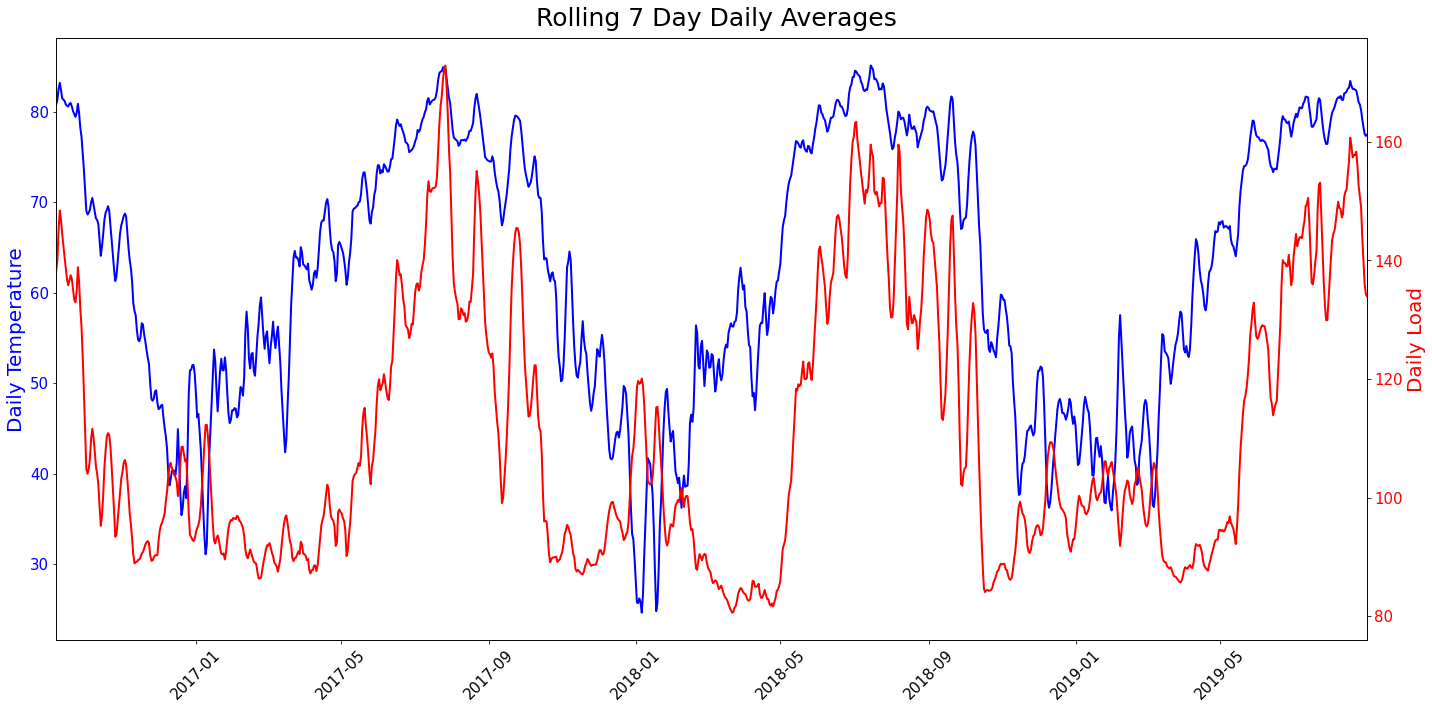

In [9]:
plot_dual_tseries(df_daily_7davg, ts_1='temp', ts_2='load', 
                  ts_1_title='Daily Temperature', ts_2_title='Daily Load',
                 plot_title='Rolling 7 Day Daily Averages')

<Figure size 1440x720 with 0 Axes>

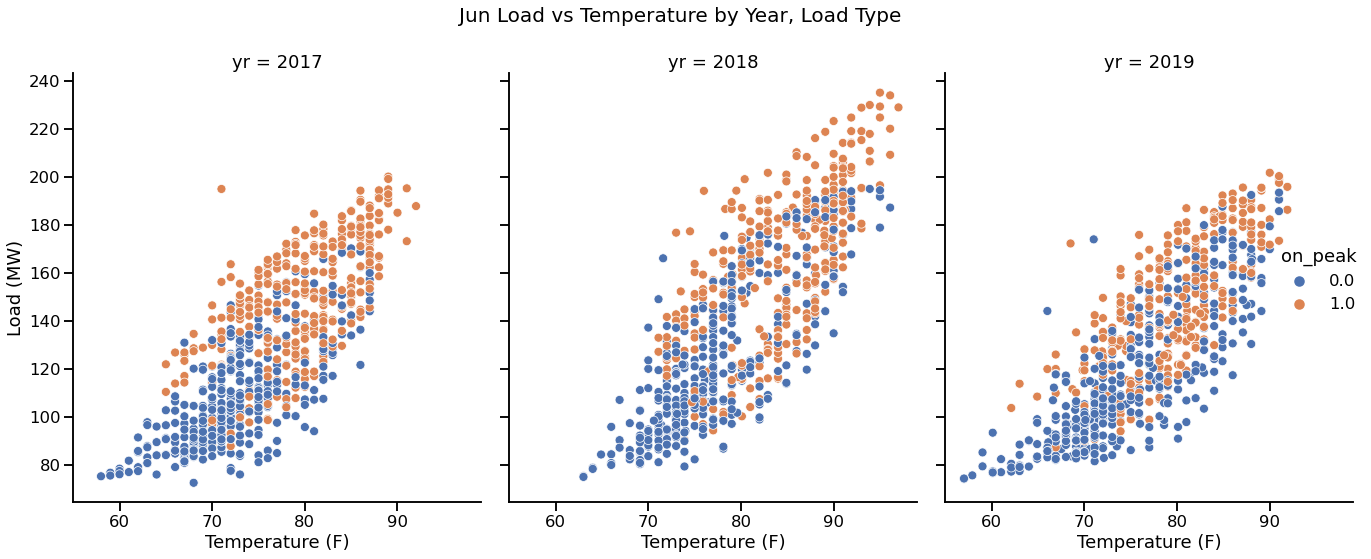

In [10]:
plot_annual_loadprofile(df, 6)

<Figure size 1440x720 with 0 Axes>

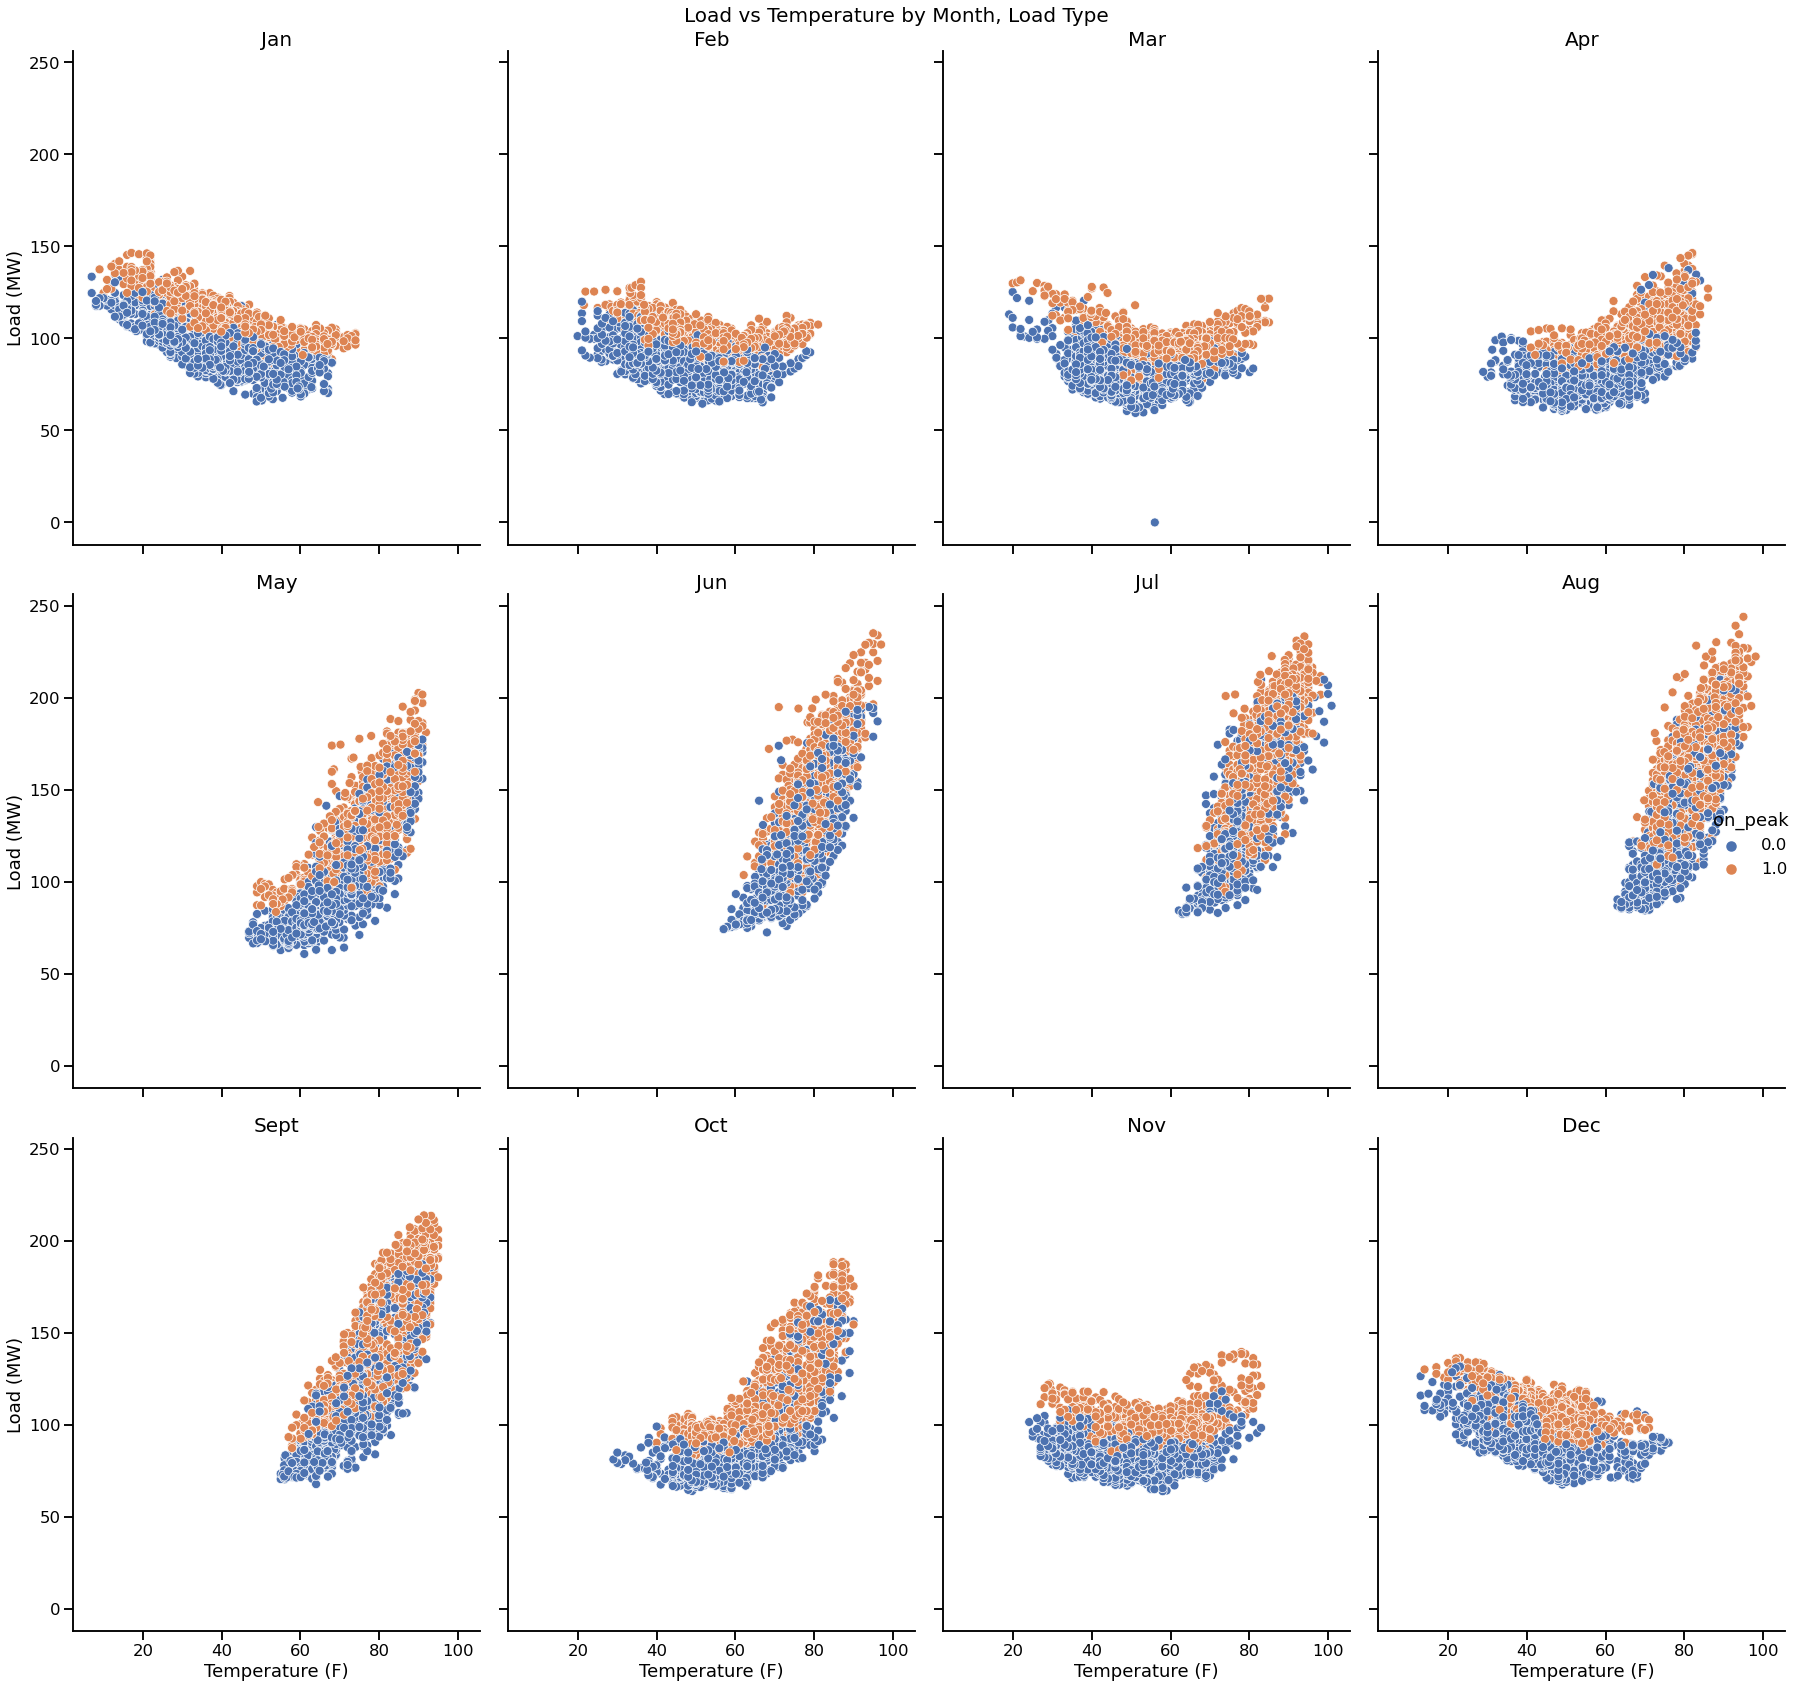

In [11]:
plot_monthly_loadprofile(df)

<Figure size 1440x720 with 0 Axes>

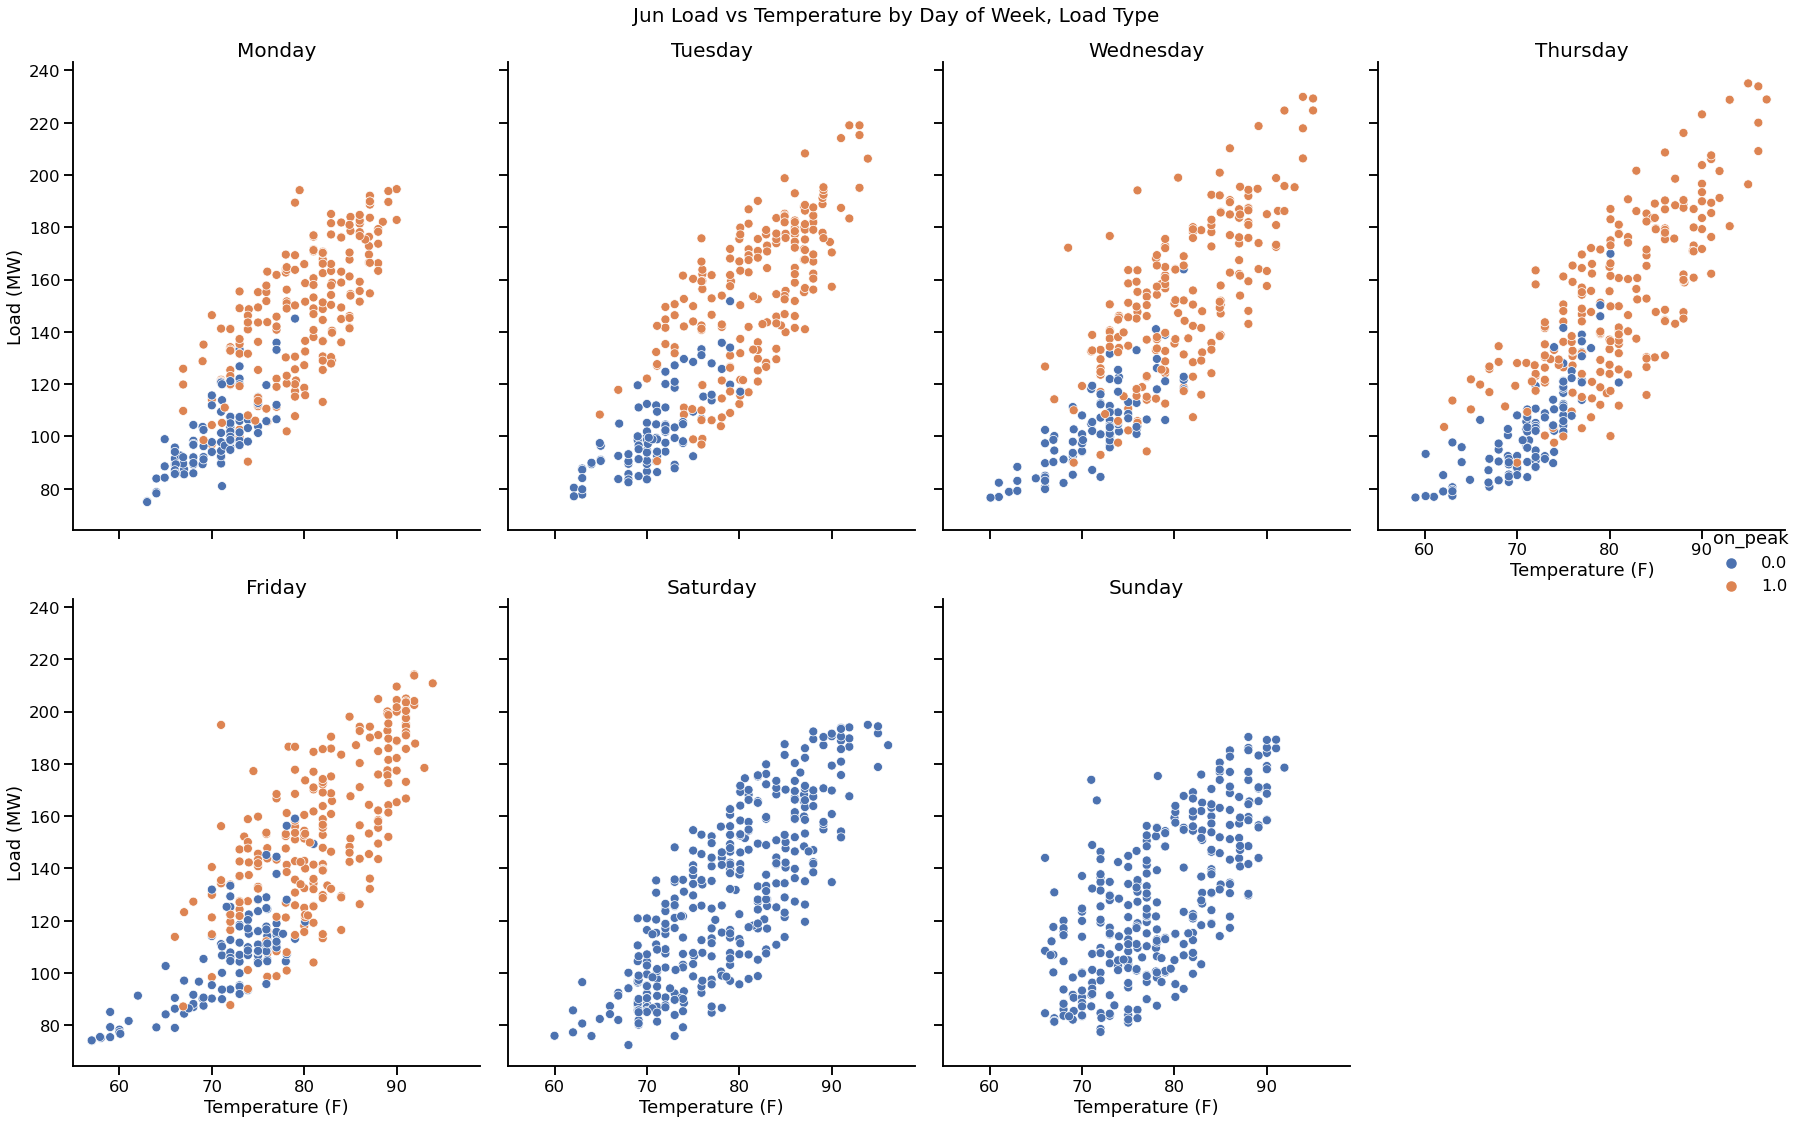

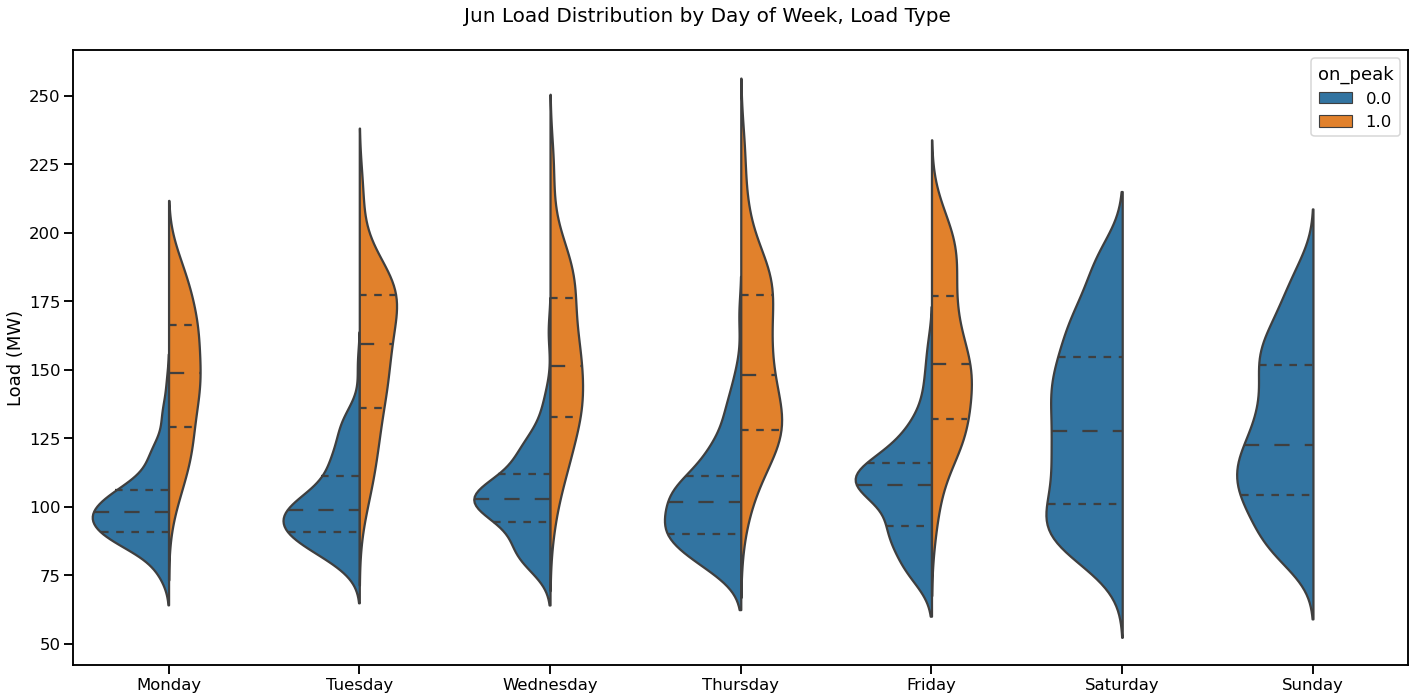

In [12]:
plot_dayofweek_loadprofile(df, 6)

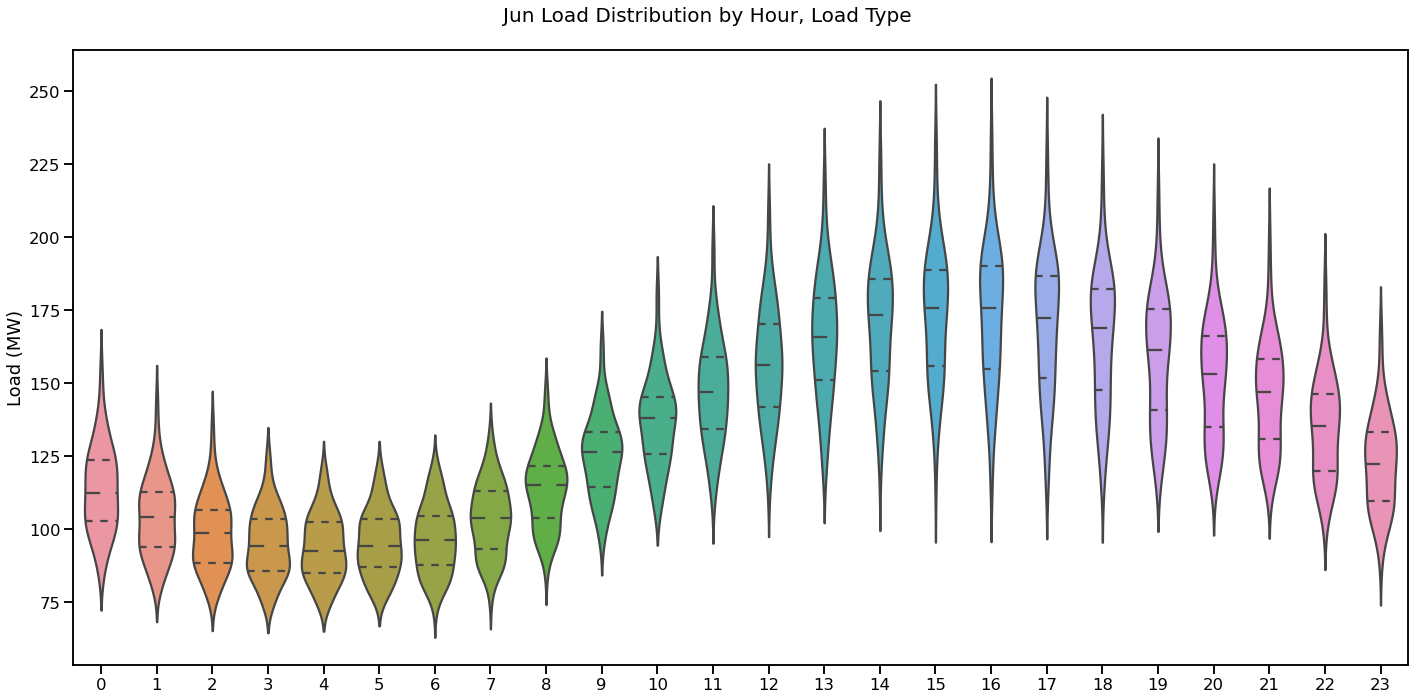

In [13]:
plot_hourly_loadprofile(df, 6)

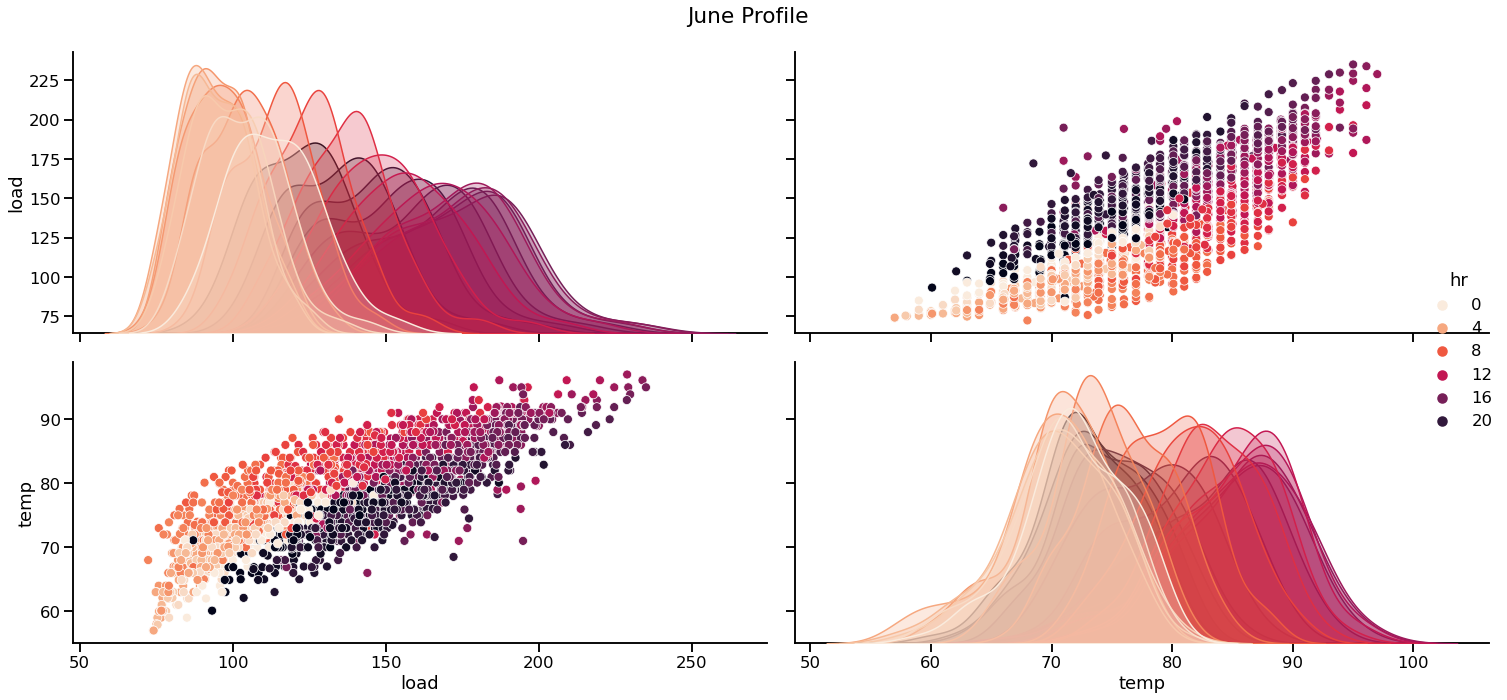

In [14]:
df_j = df.loc[df['mth'] == 6] #only June obs.
sns.set_context('talk')
sns.pairplot(data = df_j[['load', 'temp', 'hr']], hue = 'hr', height =5, aspect =2, palette = 'rocket_r')
plt.suptitle('June Profile')
plt.tight_layout()

- Visualizing the load-temperature relationship annually, there does not appear to be significant variation while the opposite is true when viewing by month, day of week, and hour
    - Monthly load variation likely stems from natural seasonality while daily and hourly variation likely stem from the workweek and a workday/temperature cycle, respectively
- The hourly load profile displays a wave pattern which could be modeled with either a polynomial regression or sine wave for short term predictions
    - However, given we are forecasting at a longer-term horizon, I opted for a more structural model using dummy variables and interactions
    - Additionally, while fat tails (see next bullet) should give us some pause when using linear regression, polynomial regression is notoriously fragile when extrapolating out of sample
- Visualizing load by day of week and peak vs. off-peak, we can see both the mean and (more importantly) the distribution of load change markedly
    - Also note that our forecast day, a Thursday, displays the fattest tails
- Looking at the workweek, Monday’s profile also differs markedly and thus I use Tuesday-Friday data to fit the model


# Modeling
-------------------

In [15]:
mask_1 = (df_j['dow'] >0) & (df_j['dow'] < 5)
reg_df = df_j.loc[mask_1].drop(columns = ['yr', 'mth', 'dom', 'dow']).reset_index(drop = True)
reg_df.head()

ts  temp        load  hr  on_peak
0 2017-06-01 00:00:00  70.0  108.028450   0      0.0
1 2017-06-01 01:00:00  69.0  100.454888   1      0.0
2 2017-06-01 02:00:00  68.0   94.941490   2      0.0
3 2017-06-01 03:00:00  67.0   91.426984   3      0.0
4 2017-06-01 04:00:00  68.0   90.396514   4      0.0

- The below plot provides a hint to what we find as we iterate through models--the optimal model will likely require hour-specific intercepts AND slopes

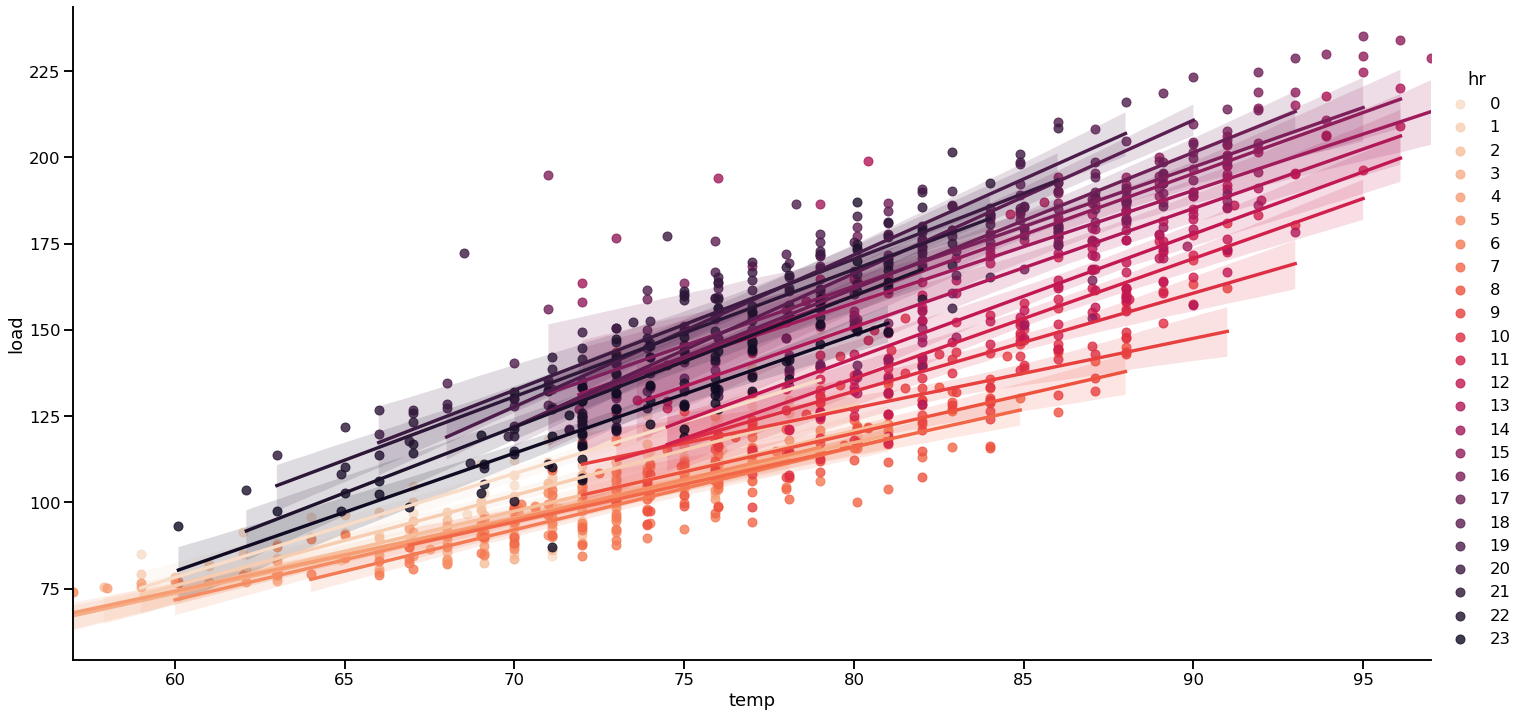

In [16]:
sns.lmplot(y = 'load', x = 'temp', hue = 'hr', data = reg_df, height = 10, aspect = 2, palette = 'rocket_r')

- We face two modeling choices
    1. Whether to simply model differences in base load (intercepts) or also differences in load sensitivity (interactions) with the dummy variables
    2. What to use as dummy variables—peak vs. off-peak or hour dummies
- I opted for hourly dummies as there is an hourly pattern in the load distribution we would overlook if aggregated to just peak and off-peak dummies
- All the models discussed below are fit to data from the Tues-Fri observations from June and utilize heteroscedasticity robust standard errors
    - Looking at the workweek using the daily visualizations in the prior section, Monday’s profile also differs markedly and weekends are known to differ markedly as well

## Model 1: $L_t = \alpha +\beta_1F_T $

- I began with a basic model, $L=a+β_1 Temp$
    - This has the advantage of letting us look at the residuals by hour
    - There is clearly clustering in the residuals of the basic model which supports the dummy variable intercepts
        - The pattern between residuals and temperature (which would give insight regarding interactions) is less clear when looking at the basic model residuals
    - The Adjusted R2 is 0.695

In [17]:
m1 = LoadModel(data_df = reg_df, y_col = 'load', x_cols = 'temp')
m1_results = m1.fit_model(model_type='OLS', error_type='HC1')
m1_results

C:\Users\Garrett\anaconda3\envs\tenaska_env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.695     
Dependent Variable: load             AIC:                10729.7419
Date:               2021-07-19 03:20 BIC:                10739.9617
No. Observations:   1224             Log-Likelihood:     -5362.9   
Df Model:           1                F-statistic:        3644.     
Df Residuals:       1222             Prob (F-statistic): 0.00      
R-squared:          0.695            Scale:              374.88    
--------------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
temp        3.8760    0.0642   60.3631  0.0000     3.7501     4.0019
const    -164.6876    4.9825  -33.0534  0.0000  -174.4531  -154.9222
-------------------------------------------------------------------
Omnibus:              19.673        Durbin-Watson:           0.195 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        18.354
Skew:                 0.257         Prob(JB):                0.000 
Kurtosis:             2.689         Condition No.:           813   
===================================================================

"""

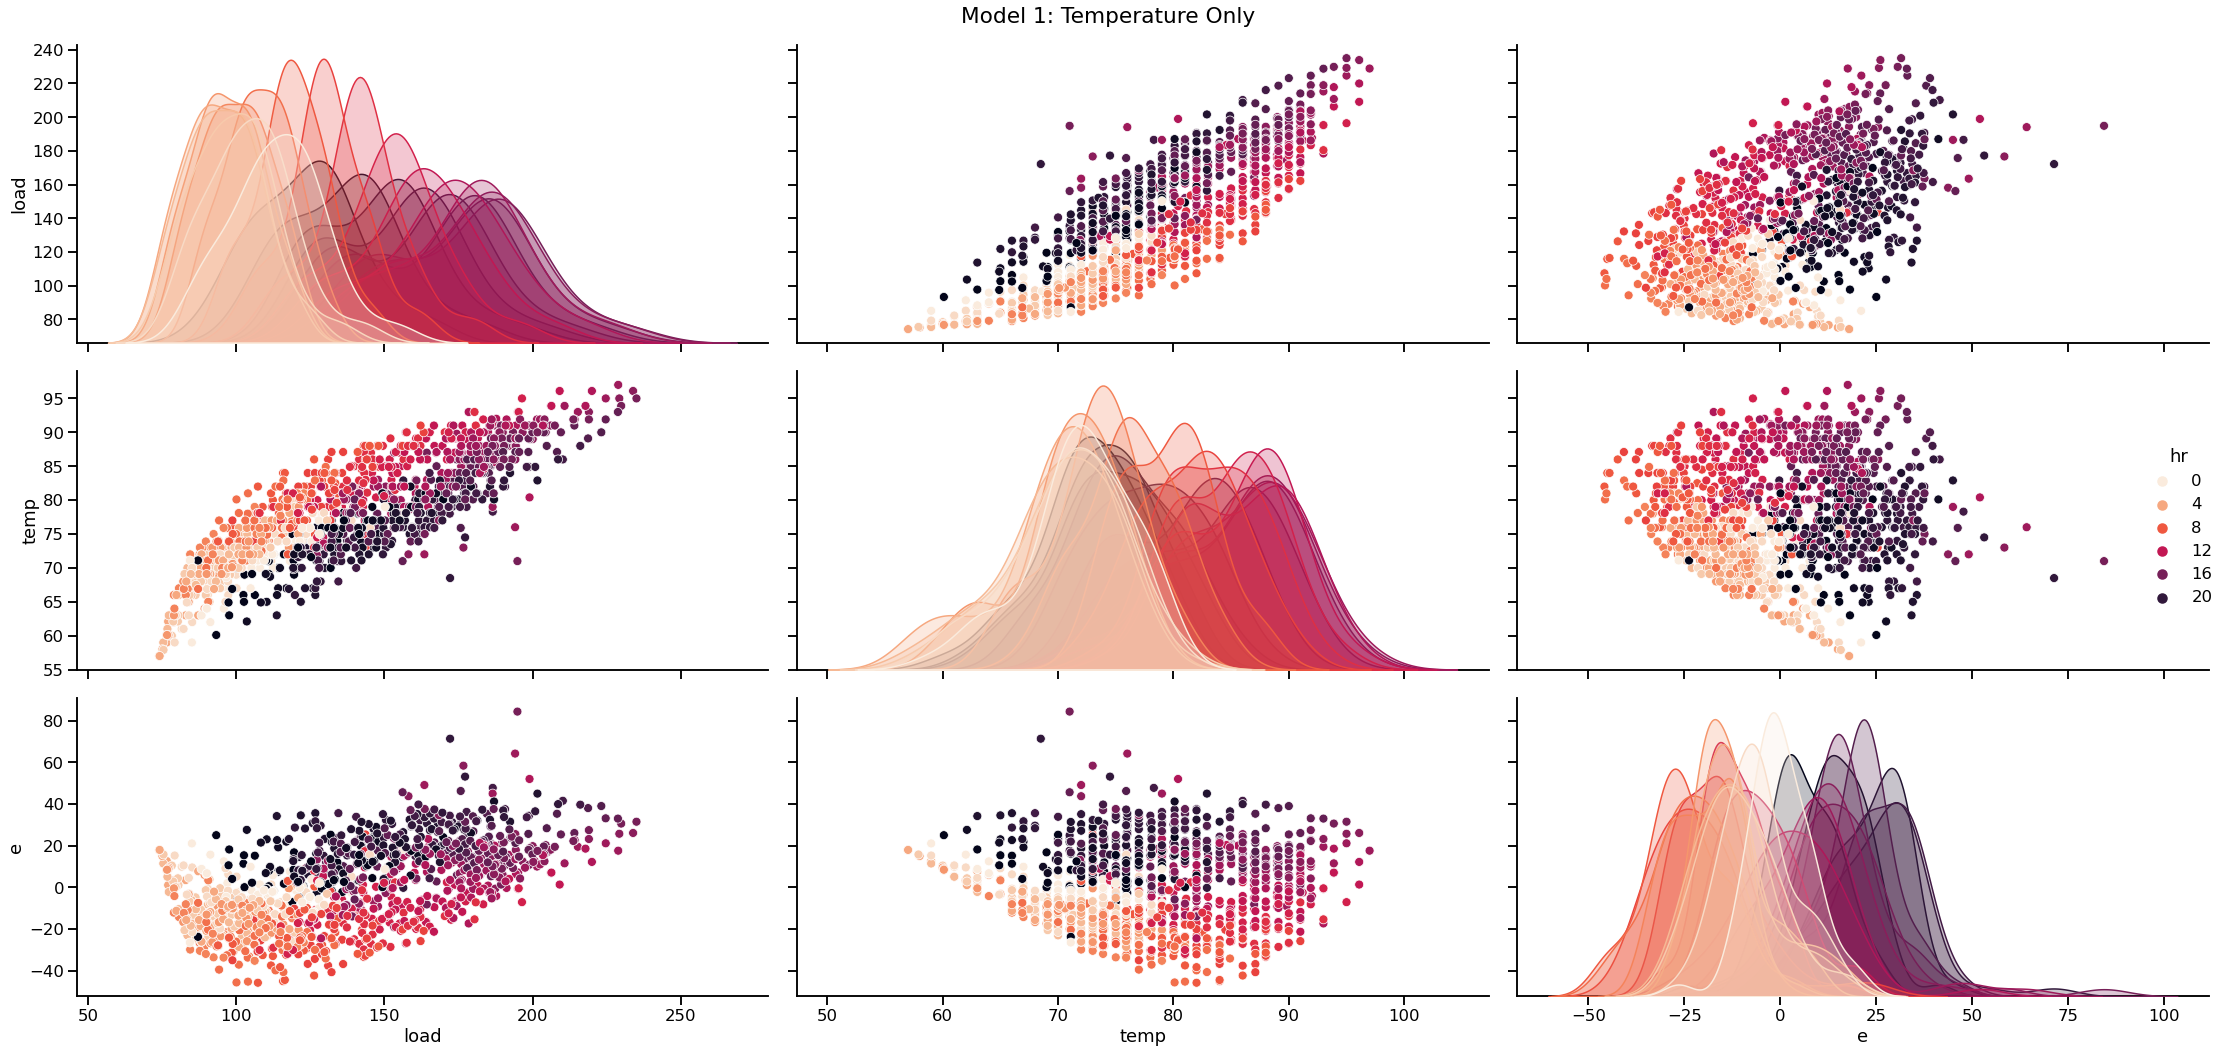

In [18]:
m1.plot_modelfit('Model 1: Temperature Only')

## Model 2: $L_t = \alpha +\sum_{i = 0}^{23}{\lambda_iH_i}+\beta_1F_T $


In [19]:
reg2_df = reg_df.copy()
hr_dummies = pd.get_dummies(reg2_df['hr'], drop_first=True, prefix = 'H')
reg2_df = reg2_df.merge(hr_dummies, left_index=True, right_index=True)
reg2_df.head()

ts  temp        load  hr  on_peak  H_1  H_2  H_3  H_4  H_5  \
0 2017-06-01 00:00:00  70.0  108.028450   0      0.0    0    0    0    0    0   
1 2017-06-01 01:00:00  69.0  100.454888   1      0.0    1    0    0    0    0   
2 2017-06-01 02:00:00  68.0   94.941490   2      0.0    0    1    0    0    0   
3 2017-06-01 03:00:00  67.0   91.426984   3      0.0    0    0    1    0    0   
4 2017-06-01 04:00:00  68.0   90.396514   4      0.0    0    0    0    1    0   

   ...  H_14  H_15  H_16  H_17  H_18  H_19  H_20  H_21  H_22  H_23  
0  ...     0     0     0     0     0     0     0     0     0     0  
1  ...     0     0     0     0     0     0     0     0     0     0  
2  ...     0     0     0     0     0     0     0     0     0     0  
3  ...     0     0     0     0     0     0     0     0     0     0  
4  ...     0     0     0     0     0     0     0     0     0     0  

[5 rows x 28 columns]

In [20]:
m2 = LoadModel(data_df = reg2_df, y_col = 'load', x_cols = list(hr_dummies.columns)+['temp'])
m2_results = m2.fit_model(model_type='OLS', error_type='HC1')
m2_results

C:\Users\Garrett\anaconda3\envs\tenaska_env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.915    
Dependent Variable: load             AIC:                9193.2466
Date:               2021-07-19 03:20 BIC:                9320.9936
No. Observations:   1224             Log-Likelihood:     -4571.6  
Df Model:           24               F-statistic:        605.5    
Df Residuals:       1199             Prob (F-statistic): 0.00     
R-squared:          0.916            Scale:              104.87   
-------------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
H_1       -6.5369    1.4968   -4.3672  0.0000    -9.4705    -3.6032
H_2      -11.2749    1.5632   -7.2127  0.0000   -14.3387    -8.2111
H_3      -12.7532    1.5343   -8.3121  0.0000   -15.7604    -9.7460
H_4      -12.6012    1.5244   -8.2664  0.0000   -15.5889    -9.6135
H_5      -13.8413    1.3881   -9.9711  0.0000   -16.5620   -11.1206
H_6      -18.5411    1.4766  -12.5565  0.0000   -21.4351   -15.6470
H_7      -20.0111    1.6252  -12.3128  0.0000   -23.1965   -16.8257
H_8      -19.3028    1.7887  -10.7913  0.0000   -22.8086   -15.7969
H_9      -14.2521    2.1571   -6.6072  0.0000   -18.4799   -10.0243
H_10      -8.7280    1.9567   -4.4606  0.0000   -12.5630    -4.8930
H_11      -2.4433    1.9774   -1.2356  0.2166    -6.3190     1.4324
H_12       4.3396    2.1420    2.0259  0.0428     0.1413     8.5379
H_13      12.5552    2.4995    5.0232  0.0000     7.6564    17.4541
H_14      18.4991    2.6663    6.9382  0.0000    13.2733    23.7249
H_15      22.0461    2.4175    9.1193  0.0000    17.3079    26.7843
H_16      24.1415    2.6061    9.2633  0.0000    19.0336    29.2494
H_17      24.5153    2.0910   11.7240  0.0000    20.4170    28.6137
H_18      27.2946    1.9937   13.6907  0.0000    23.3871    31.2022
H_19      29.1463    2.0304   14.3552  0.0000    25.1668    33.1257
H_20      28.1307    2.1464   13.1058  0.0000    23.9238    32.3376
H_21      25.0117    1.7319   14.4416  0.0000    21.6172    28.4062
H_22      16.1874    1.6670    9.7103  0.0000    12.9201    19.4547
H_23       6.9243    1.6555    4.1825  0.0000     3.6795    10.1691
temp       3.1729    0.0812   39.0833  0.0000     3.0137     3.3320
const   -114.0204    5.9171  -19.2698  0.0000  -125.6177  -102.4232
------------------------------------------------------------------
Omnibus:             108.252       Durbin-Watson:          0.366  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       302.268
Skew:                0.460         Prob(JB):               0.000  
Kurtosis:            5.254         Condition No.:          1945   
==================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

- We could conduct a Lagrange Multiplier test to test Model 2 vs. Model 1, but given all the dummies are significant we know Model 2 offers a superior fit

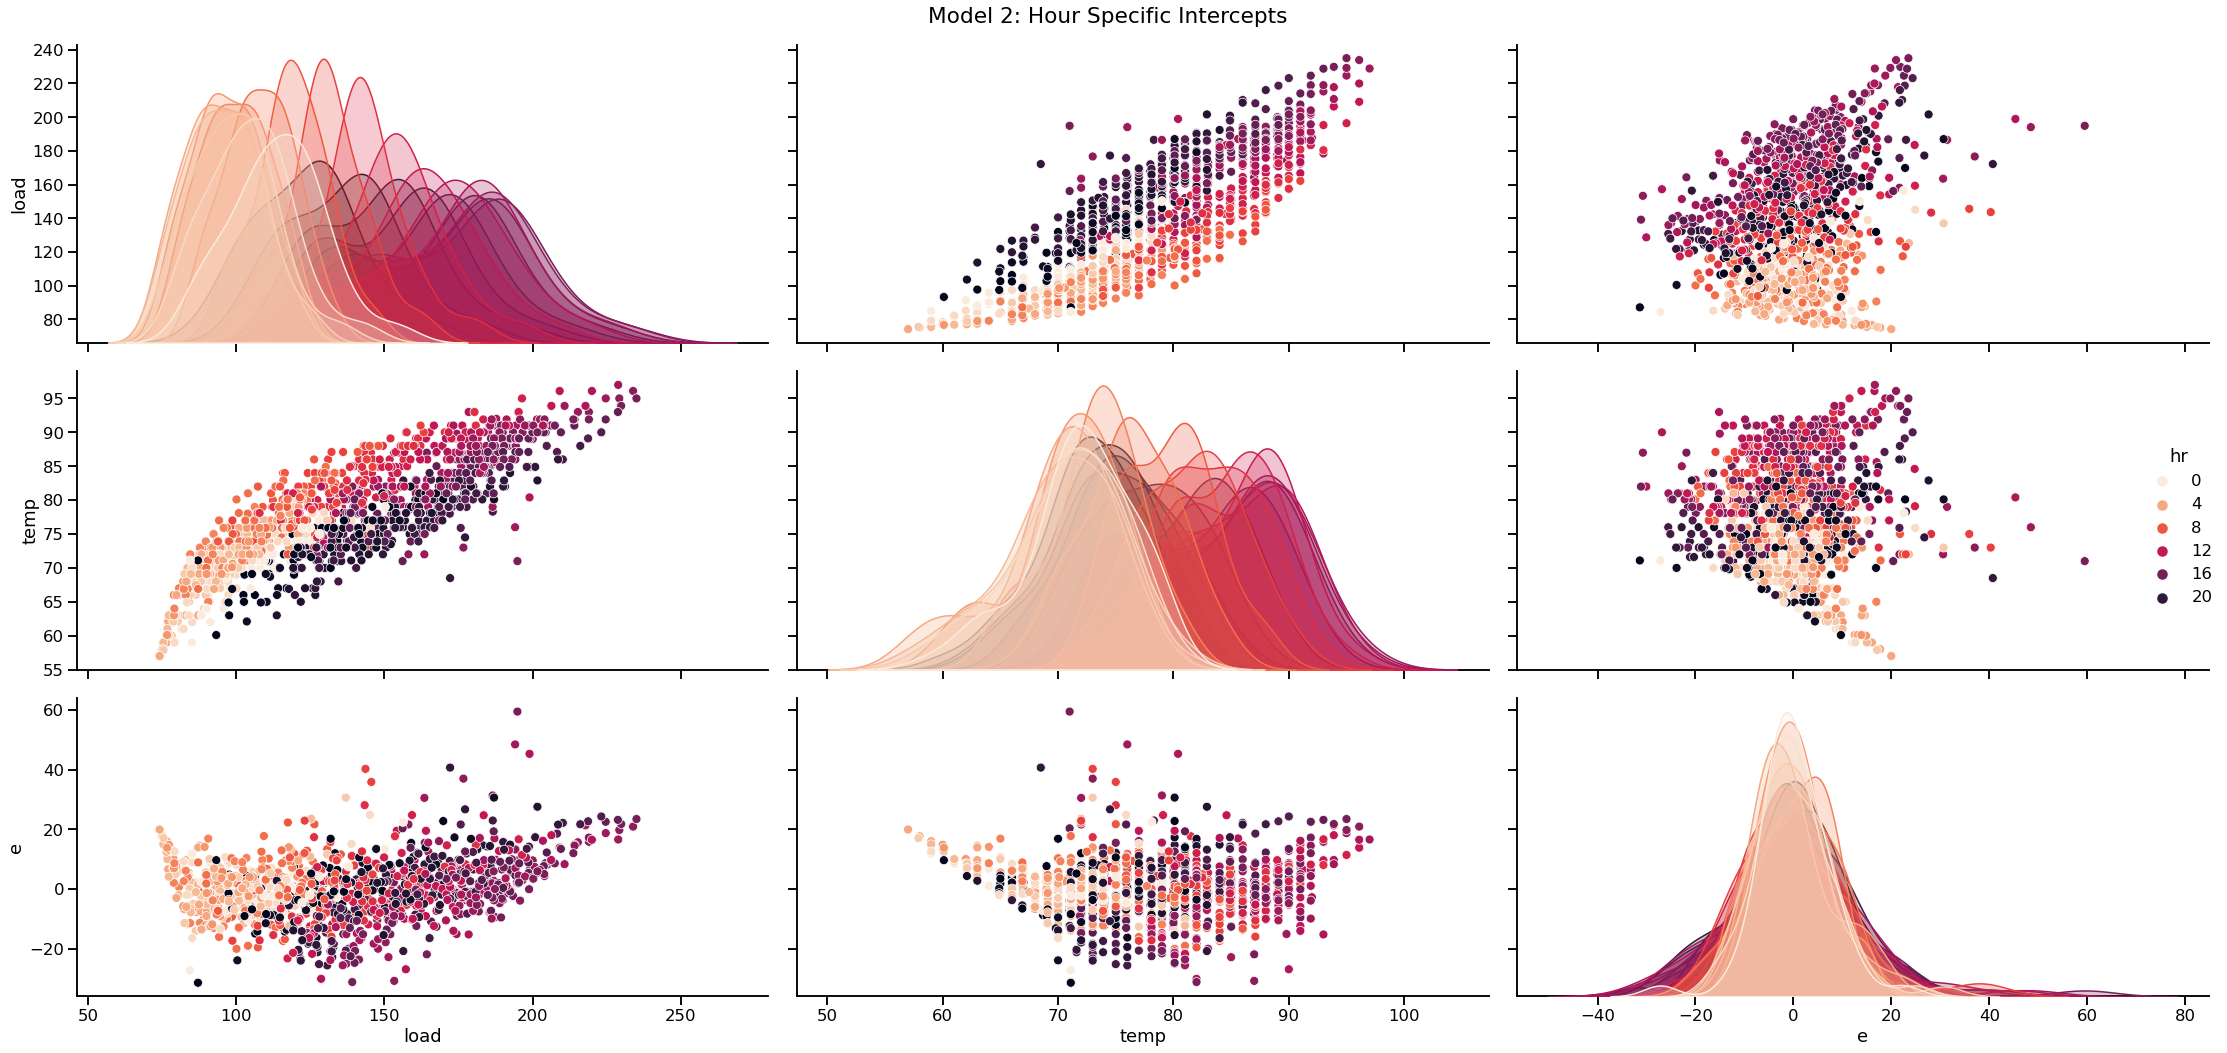

In [21]:
m2.plot_modelfit('Model 2: Hour Specific Intercepts')

## Model 3: $L = \alpha +\sum_{i = 0}^{23}{\lambda_iH_i}+\beta_1F +\sum_{i = 0}^{23}{\phi_iH_iF_t}$

- To test whether the intercepts and interactions are significant, I conducted a joint Likelihood Multiplier test of the intercept-interaction model vs. the intercept model
    - This stepwise process (thinking of our iteration from Model 1 to 2 to 3) is valid because the models are nested
- The LM test returns a p-value < 0.01, which supports the least restricted model
    - By least restricted I mean the model which includes both hourly intercepts and hourly interactions with temperature. 
    - Thus, each hour has a distinct base load and sensitivity to temperature: $L=a+∑λ_i H_i+β_1 Temp+∑ϕ_i H_i Temp$
- Plotting the residuals, they also appear much closer to white noise which supports the additional terms

In [22]:
reg3_df = reg2_df.copy()
for n in range(1, 24):
    hr = 'H_'+str(n)
    reg3_df[hr+'*Temp'] = reg3_df[hr]*reg2_df['temp']

In [23]:
m3 = LoadModel(data_df = reg3_df, y_col = 'load', x_cols = list(reg3_df.columns[5:])+['temp'])
m3_results = m3.fit_model(model_type='OLS', error_type='HC1')
m3_results

C:\Users\Garrett\anaconda3\envs\tenaska_env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.923    
Dependent Variable: load             AIC:                9082.0310
Date:               2021-07-19 03:20 BIC:                9327.3052
No. Observations:   1224             Log-Likelihood:     -4493.0  
Df Model:           47               F-statistic:        503.3    
Df Residuals:       1176             Prob (F-statistic): 0.00     
R-squared:          0.926            Scale:              94.034   
------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------
H_1             21.0204  22.3118  0.9421 0.3461  -22.7099  64.7508
H_2             37.0042  19.8630  1.8630 0.0625   -1.9265  75.9349
H_3             45.2223  19.5867  2.3088 0.0210    6.8331  83.6116
H_4             50.8637  19.6731  2.5854 0.0097   12.3052  89.4222
H_5             34.6025  19.7110  1.7555 0.0792   -4.0304  73.2354
H_6             26.8484  21.5464  1.2461 0.2127  -15.3817  69.0786
H_7             44.5183  24.0702  1.8495 0.0644   -2.6585  91.6950
H_8             43.6461  31.2883  1.3950 0.1630  -17.6779 104.9701
H_9             67.6933  41.2118  1.6426 0.1005  -13.0803 148.4669
H_10             6.8559  37.8498  0.1811 0.8563  -67.3282  81.0401
H_11           -39.7431  32.3525 -1.2284 0.2193 -103.1529  23.6666
H_12           -44.1712  34.3683 -1.2852 0.1987 -111.5317  23.1894
H_13           -21.9236  38.9662 -0.5626 0.5737  -98.2961  54.4488
H_14            -0.7227  49.6884 -0.0145 0.9884  -98.1101  96.6647
H_15           -20.7471  43.7202 -0.4745 0.6351 -106.4371  64.9429
H_16           -10.9402  51.2922 -0.2133 0.8311 -111.4711  89.5907
H_17           -51.6466  32.6981 -1.5795 0.1142 -115.7337  12.4405
H_18           -86.4031  26.0255 -3.3199 0.0009 -137.4121 -35.3941
H_19           -77.6422  29.0815 -2.6698 0.0076 -134.6409 -20.6435
H_20           -31.0055  37.8336 -0.8195 0.4125 -105.1579  43.1470
H_21           -24.7757  27.7453 -0.8930 0.3719  -79.1554  29.6040
H_22           -42.2078  28.2470 -1.4942 0.1351  -97.5708  13.1552
H_23           -22.8889  26.9547 -0.8492 0.3958  -75.7190  29.9413
H_1*Temp        -0.3904   0.3183 -1.2265 0.2200   -1.0142   0.2334
H_2*Temp        -0.6844   0.2829 -2.4195 0.0155   -1.2389  -0.1300
H_3*Temp        -0.8298   0.2782 -2.9830 0.0029   -1.3751  -0.2846
H_4*Temp        -0.9133   0.2792 -3.2704 0.0011   -1.4606  -0.3659
H_5*Temp        -0.6852   0.2782 -2.4628 0.0138   -1.2305  -0.1399
H_6*Temp        -0.6164   0.3004 -2.0519 0.0402   -1.2053  -0.0276
H_7*Temp        -0.8362   0.3284 -2.5461 0.0109   -1.4799  -0.1925
H_8*Temp        -0.7763   0.4056 -1.9137 0.0557   -1.5713   0.0187
H_9*Temp        -0.9863   0.5117 -1.9275 0.0539   -1.9892   0.0166
H_10*Temp       -0.1646   0.4657 -0.3535 0.7237   -1.0773   0.7481
H_11*Temp        0.4645   0.3980  1.1672 0.2431   -0.3155   1.2445
H_12*Temp        0.5926   0.4179  1.4182 0.1561   -0.2264   1.4116
H_13*Temp        0.4278   0.4667  0.9166 0.3593   -0.4870   1.3426
H_14*Temp        0.2502   0.5811  0.4306 0.6667   -0.8887   1.3892
H_15*Temp        0.5268   0.5195  1.0140 0.3106   -0.4914   1.5450
H_16*Temp        0.4389   0.6070  0.7230 0.4697   -0.7508   1.6286
H_17*Temp        0.9383   0.4064  2.3090 0.0209    0.1418   1.7348
H_18*Temp        1.4284   0.3397  4.2044 0.0000    0.7625   2.0942
H_19*Temp        1.3858   0.3848  3.6018 0.0003    0.6317   2.1400
H_20*Temp        0.7881   0.4998  1.5770 0.1148   -0.1914   1.7677
H_21*Temp        0.6723   0.3808  1.7654 0.0775   -0.0741   1.4186
H_22*Temp        0.7948   0.3895  2.0406 0.0413    0.0314   1.5583
H_23*Temp        0.4114   0.3736  1.1013 0.2708   -0.3208   1.1436
temp             3.0107   0.2378 12.6624 0.0000    2.5447   3.4767
const         -1

- Given the significance of the slope terms is mixed, I conduct a LM test of overall model significance vs. Model 2; the results below support Model 3

In [24]:
m3.model.compare_lm_test(m2.model)

C:\Users\Garrett\anaconda3\envs\tenaska_env\lib\site-packages\statsmodels\regression\linear_model.py:2086: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = wexog * wresid[:, None]


(142.29949120575606, 3.4713934404480327e-19, 23.0)

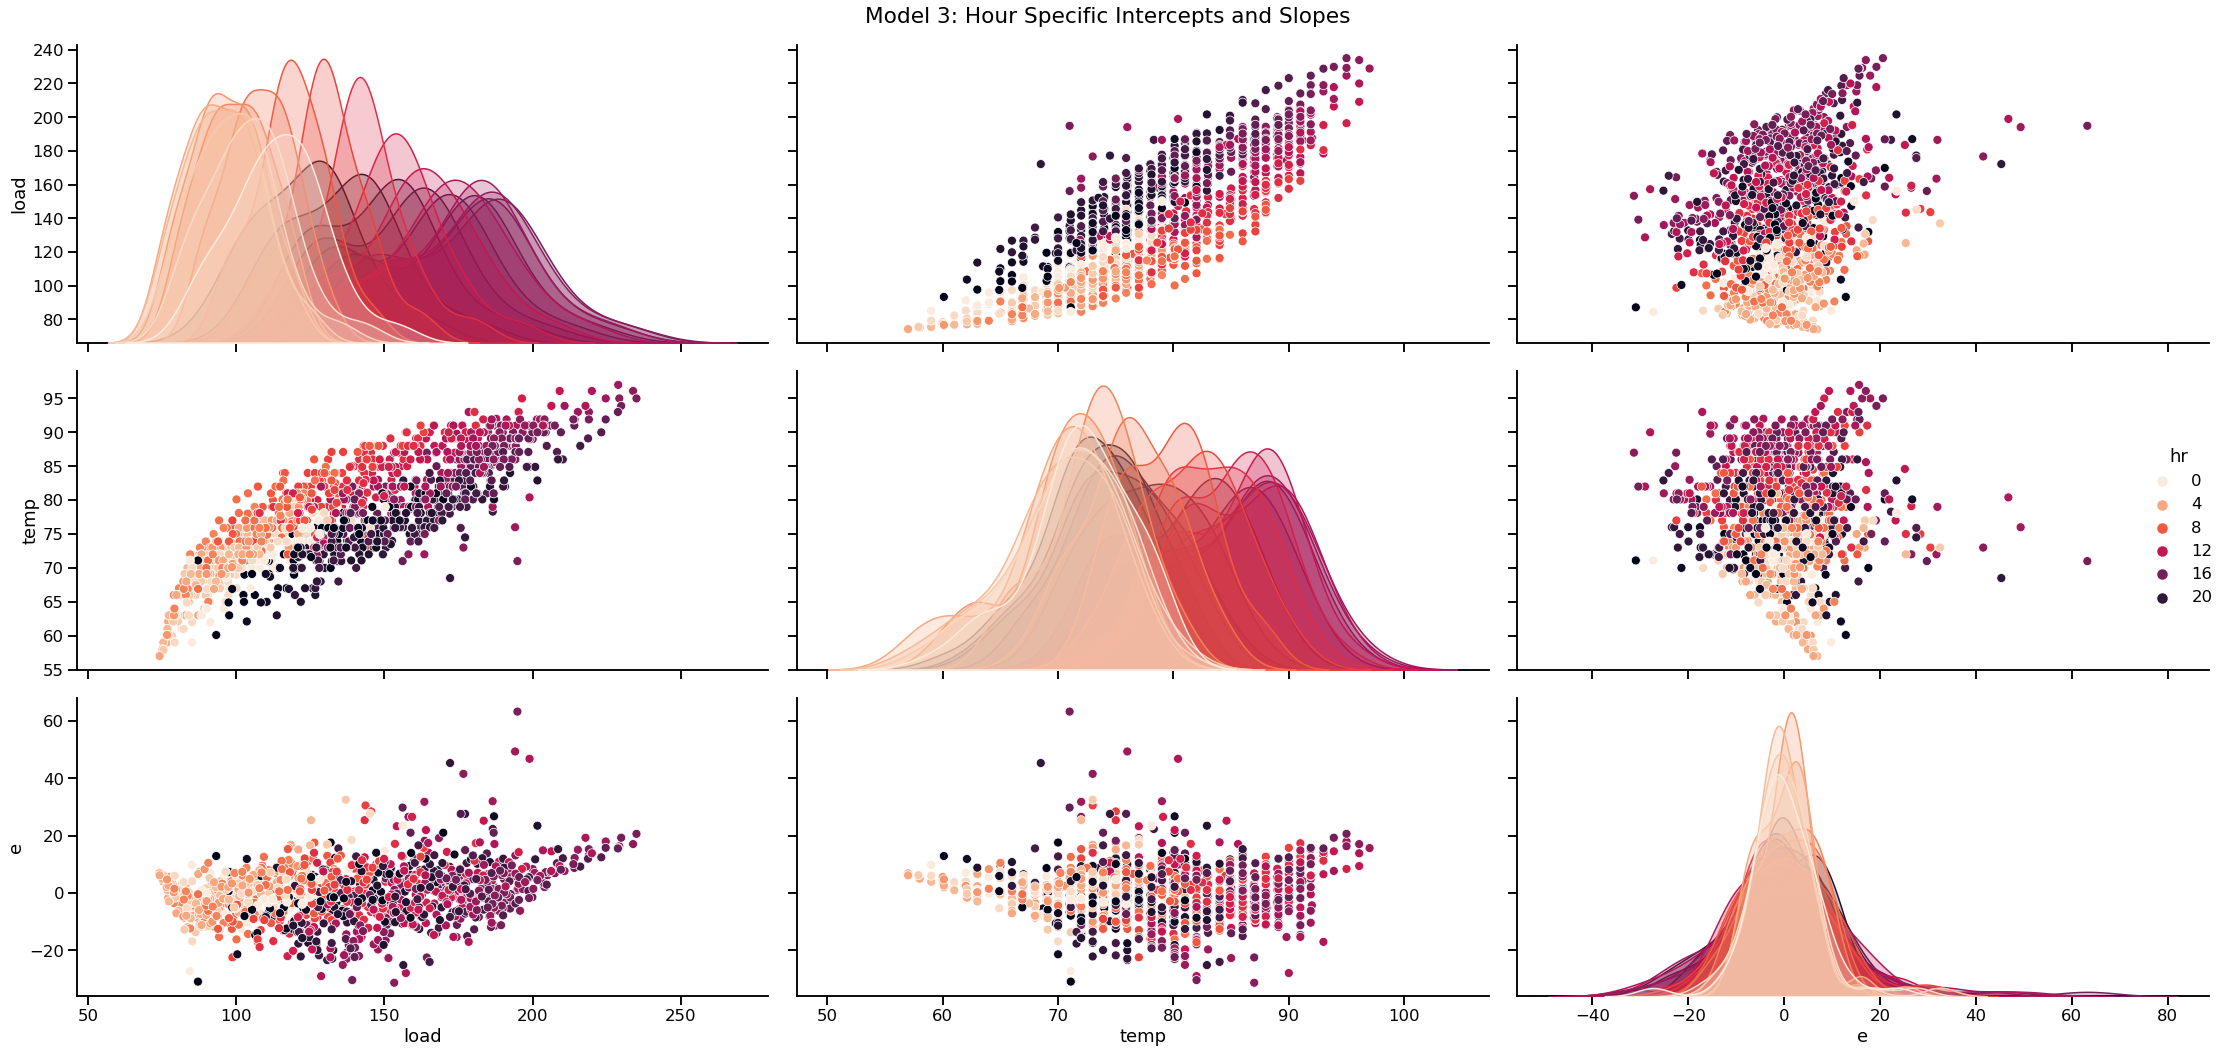

In [25]:
m3.plot_modelfit('Model 3: Hour Specific Intercepts and Slopes')

## Model 3A: $L = \alpha +\sum_{i = 0}^{23}{\lambda_iH_i}+\beta_1F +\sum_{i = 0}^{23}{\phi_iH_iF_t}$ Using Robust Regression

- Given the presence of outliers, especially on our prediction day of Thursday, I chose to implement a robust regression version of Model 3 for the final prediction
    - This minimizes the mean absolute deviation instead of squared deviations
    - MAD is more robust in the presence of fat tails
- I arrived at the predictions by averaging model fitted values across all Thursdays in June

In [26]:
robust_m3 = LoadModel(data_df = reg3_df, y_col = 'load', x_cols = list(reg3_df.columns[5:])+['temp'])
robust_m3_results = robust_m3.fit_model(model_type='Robust')
robust_m3_results

C:\Users\Garrett\anaconda3\envs\tenaska_env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Robust linear model
=============================================================
Model:                RLM               Df Residuals:  1176  
Dependent Variable:   load              Norm:          HuberT
Date:                 2021-07-19 03:20  Scale Est.:    mad   
No. Observations:     1224              Cov. Type:     H1    
Df Model:             47                Scale:         7.9209
-------------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-------------------------------------------------------------
H_1        20.8267  25.6809  0.8110 0.4174  -29.5070  71.1604
H_2        33.2344  25.2795  1.3147 0.1886  -16.3124  82.7813
H_3        39.6250  25.0577  1.5813 0.1138   -9.4873  88.7373
H_4        44.3473  24.9521  1.7773 0.0755   -4.5580  93.2526
H_5        26.5021  26.4874  1.0006 0.3170  -25.4122  78.4164
H_6        18.3708  28.6680  0.6408 0.5216  -37.8174  74.5591
H_7        31.1214  29.0137  1.0726 0.2834  -25.7444  87.9871
H_8        24.3217  30.4256  0.7994 0.4241  -35.3115  83.9548
H_9        36.0314  28.8069  1.2508 0.2110  -20.4290  92.4918
H_10       -7.7902  29.4797 -0.2643 0.7916  -65.5693  49.9889
H_11      -47.6050  29.4130 -1.6185 0.1056 -105.2534  10.0434
H_12      -69.4663  28.1258 -2.4698 0.0135 -124.5918 -14.3408
H_13      -38.3628  27.7047 -1.3847 0.1661  -92.6631  15.9374
H_14      -57.7402  26.3350 -2.1925 0.0283 -109.3559  -6.1246
H_15      -69.2570  25.8005 -2.6843 0.0073 -119.8250 -18.6891
H_16      -54.3457  25.2407 -2.1531 0.0313 -103.8166  -4.8747
H_17      -77.3517  25.5575 -3.0266 0.0025 -127.4434 -27.2599
H_18      -97.5068  26.2954 -3.7081 0.0002 -149.0448 -45.9687
H_19      -89.4892  26.8753 -3.3298 0.0009 -142.1638 -36.8147
H_20      -60.6430  26.8429 -2.2592 0.0239 -113.2540  -8.0319
H_21      -25.2572  26.0641 -0.9690 0.3325  -76.3418  25.8274
H_22      -37.9109  26.7977 -1.4147 0.1572  -90.4335  14.6117
H_23      -22.3002  26.5371 -0.8403 0.4007  -74.3119  29.7116
H_1*Temp   -0.3945   0.3585 -1.1002 0.2712   -1.0972   0.3083
H_2*Temp   -0.6401   0.3533 -1.8121 0.0700   -1.3325   0.0522
H_3*Temp   -0.7588   0.3515 -2.1590 0.0309   -1.4477  -0.0699
H_4*Temp   -0.8267   0.3507 -2.3572 0.0184   -1.5142  -0.1393
H_5*Temp   -0.5742   0.3701 -1.5513 0.1208   -1.2997   0.1513
H_6*Temp   -0.4975   0.3937 -1.2637 0.2064   -1.2691   0.2741
H_7*Temp   -0.6503   0.3892 -1.6709 0.0947   -1.4132   0.1125
H_8*Temp   -0.5229   0.3976 -1.3152 0.1884   -1.3022   0.2564
H_9*Temp   -0.5923   0.3731 -1.5874 0.1124   -1.3235   0.1390
H_10*Temp   0.0234   0.3763  0.0621 0.9505   -0.7142   0.7610
H_11*Temp   0.5746   0.3723  1.5434 0.1227   -0.1551   1.3042
H_12*Temp   0.8981   0.3566  2.5189 0.0118    0.1993   1.5970
H_13*Temp   0.6406   0.3515  1.8226 0.0684   -0.0483   1.3296
H_14*Temp   0.9228   0.3370  2.7380 0.0062    0.2622   1.5834
H_15*Temp   1.1069   0.3320  3.3336 0.0009    0.4561   1.7577
H_16*Temp   0.9599   0.3272  2.9339 0.0033    0.3187   1.6012
H_17*Temp   1.2547   0.3330  3.7682 0.0002    0.6021   1.9073
H_18*Temp   1.5797   0.3458  4.5682 0.0000    0.9019   2.2575
H_19*Temp   1.5561   0.3587  4.3385 0.0000    0.8531   2.2590
H_20*Temp   1.1891   0.3626  3.2794 0.0010    0.4785   1.8998
H_21*Temp   0.6908   0.3550  1.9460 0.0517   -0.0050   1.3867
H_22*Temp   0.7386   0.3668  2.0134 0.0441    0.0196   1.4575
H_23*Temp   0.4059   0.3659  1.1092 0.2673   -0.3113   1.1231
temp        2.8892   0.2580 11.2005 0.0000    2.3836   3.3948
const     -93.6152  18.5900 -5.0358 0.0000 -130.0509 -57.1795
=============================================================

"""

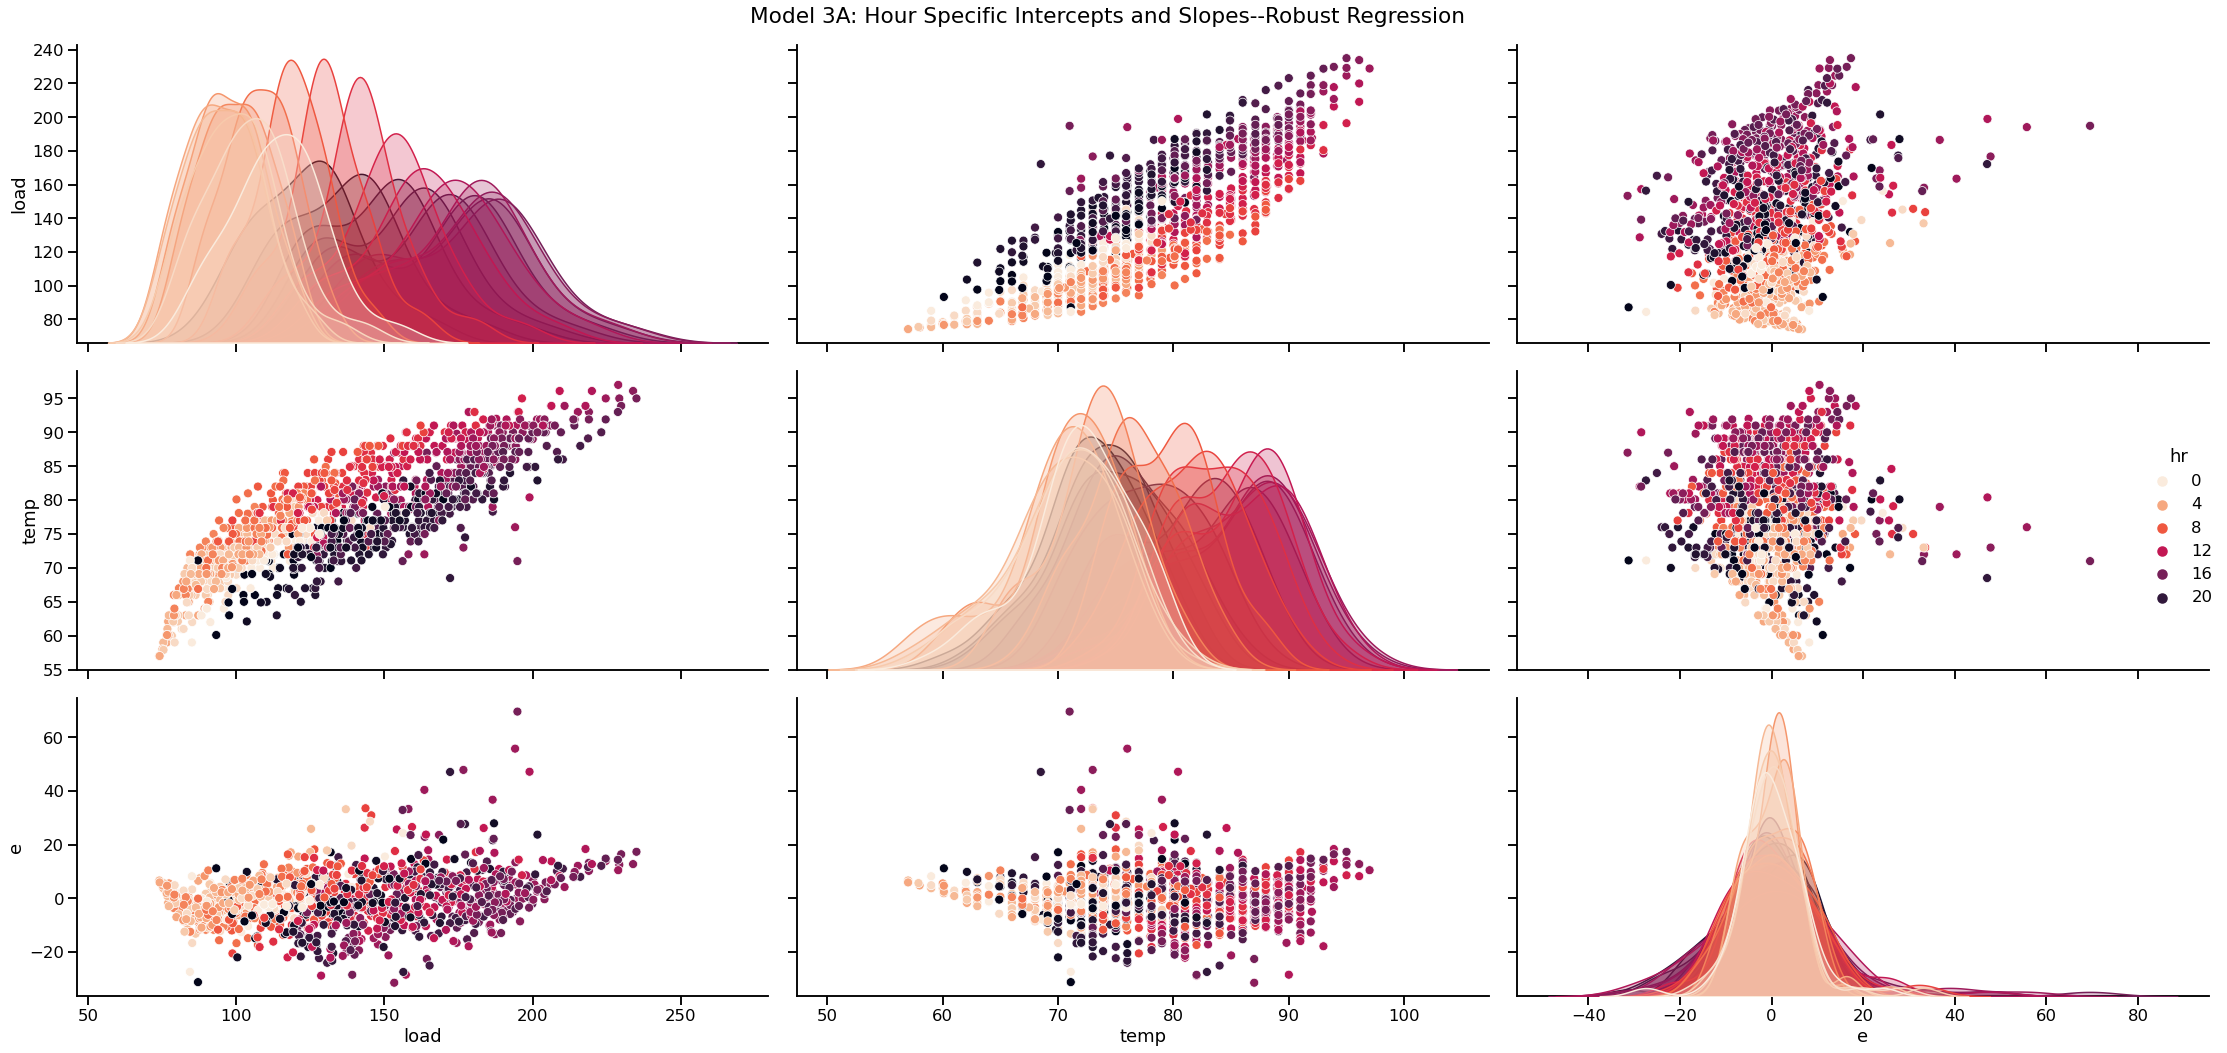

In [27]:
robust_m3.plot_modelfit('Model 3A: Hour Specific Intercepts and Slopes--Robust Regression')

In [28]:
robust_m3_results

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Robust linear model
=============================================================
Model:                RLM               Df Residuals:  1176  
Dependent Variable:   load              Norm:          HuberT
Date:                 2021-07-19 03:20  Scale Est.:    mad   
No. Observations:     1224              Cov. Type:     H1    
Df Model:             47                Scale:         7.9209
-------------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-------------------------------------------------------------
H_1        20.8267  25.6809  0.8110 0.4174  -29.5070  71.1604
H_2        33.2344  25.2795  1.3147 0.1886  -16.3124  82.7813
H_3        39.6250  25.0577  1.5813 0.1138   -9.4873  88.7373
H_4        44.3473  24.9521  1.7773 0.0755   -4.5580  93.2526
H_5        26.5021  26.4874  1.0006 0.3170  -25.4122  78.4164
H_6        18.3708  28.6680  0.6408 0.5216  -37.8174  74.5591
H_7        31.1214  29.0137  1.0726 0.2834  -25.7444  87.9871
H_8        24.3217  30.4256  0.7994 0.4241  -35.3115  83.9548
H_9        36.0314  28.8069  1.2508 0.2110  -20.4290  92.4918
H_10       -7.7902  29.4797 -0.2643 0.7916  -65.5693  49.9889
H_11      -47.6050  29.4130 -1.6185 0.1056 -105.2534  10.0434
H_12      -69.4663  28.1258 -2.4698 0.0135 -124.5918 -14.3408
H_13      -38.3628  27.7047 -1.3847 0.1661  -92.6631  15.9374
H_14      -57.7402  26.3350 -2.1925 0.0283 -109.3559  -6.1246
H_15      -69.2570  25.8005 -2.6843 0.0073 -119.8250 -18.6891
H_16      -54.3457  25.2407 -2.1531 0.0313 -103.8166  -4.8747
H_17      -77.3517  25.5575 -3.0266 0.0025 -127.4434 -27.2599
H_18      -97.5068  26.2954 -3.7081 0.0002 -149.0448 -45.9687
H_19      -89.4892  26.8753 -3.3298 0.0009 -142.1638 -36.8147
H_20      -60.6430  26.8429 -2.2592 0.0239 -113.2540  -8.0319
H_21      -25.2572  26.0641 -0.9690 0.3325  -76.3418  25.8274
H_22      -37.9109  26.7977 -1.4147 0.1572  -90.4335  14.6117
H_23      -22.3002  26.5371 -0.8403 0.4007  -74.3119  29.7116
H_1*Temp   -0.3945   0.3585 -1.1002 0.2712   -1.0972   0.3083
H_2*Temp   -0.6401   0.3533 -1.8121 0.0700   -1.3325   0.0522
H_3*Temp   -0.7588   0.3515 -2.1590 0.0309   -1.4477  -0.0699
H_4*Temp   -0.8267   0.3507 -2.3572 0.0184   -1.5142  -0.1393
H_5*Temp   -0.5742   0.3701 -1.5513 0.1208   -1.2997   0.1513
H_6*Temp   -0.4975   0.3937 -1.2637 0.2064   -1.2691   0.2741
H_7*Temp   -0.6503   0.3892 -1.6709 0.0947   -1.4132   0.1125
H_8*Temp   -0.5229   0.3976 -1.3152 0.1884   -1.3022   0.2564
H_9*Temp   -0.5923   0.3731 -1.5874 0.1124   -1.3235   0.1390
H_10*Temp   0.0234   0.3763  0.0621 0.9505   -0.7142   0.7610
H_11*Temp   0.5746   0.3723  1.5434 0.1227   -0.1551   1.3042
H_12*Temp   0.8981   0.3566  2.5189 0.0118    0.1993   1.5970
H_13*Temp   0.6406   0.3515  1.8226 0.0684   -0.0483   1.3296
H_14*Temp   0.9228   0.3370  2.7380 0.0062    0.2622   1.5834
H_15*Temp   1.1069   0.3320  3.3336 0.0009    0.4561   1.7577
H_16*Temp   0.9599   0.3272  2.9339 0.0033    0.3187   1.6012
H_17*Temp   1.2547   0.3330  3.7682 0.0002    0.6021   1.9073
H_18*Temp   1.5797   0.3458  4.5682 0.0000    0.9019   2.2575
H_19*Temp   1.5561   0.3587  4.3385 0.0000    0.8531   2.2590
H_20*Temp   1.1891   0.3626  3.2794 0.0010    0.4785   1.8998
H_21*Temp   0.6908   0.3550  1.9460 0.0517   -0.0050   1.3867
H_22*Temp   0.7386   0.3668  2.0134 0.0441    0.0196   1.4575
H_23*Temp   0.4059   0.3659  1.1092 0.2673   -0.3113   1.1231
temp        2.8892   0.2580 11.2005 0.0000    2.3836   3.3948
const     -93.6152  18.5900 -5.0358 0.0000 -130.0509 -57.1795
=============================================================

"""

# Prediction
----------------

In [29]:
pred_df = robust_m3.output_df.merge(df_j[['ts','dow']], left_on='ts', right_on = 'ts')
pred_df = pred_df[['dow', 'hr', 'yhat']].groupby(['dow', 'hr']).mean().reset_index()
pred_df.loc[pred_df['dow'] == 3].max()

dow       3.000000
hr       23.000000
yhat    175.067255
dtype: float64

Prediction: Peak load—175MW at Hour 16
   - This is consistent with the density bivariate plot of max load and max load hour
   - I think this is the optimal prediction given the data, but we should be relatively more skeptical forecasting a Thursday given it shows the fattest tails of the weekdays
   - Similar logic holds for Hour 16 load

Discussion:
- Robust regression will help mitigate the impact but will not cure it. However, the residuals look relatively Gaussian. 
- Given weather is typically modeled as a normal distribution, I would seek to improve the model by looking for alternative drivers behind the fat tails. 
- The forecast would also improve as the forecast horizon approaches.


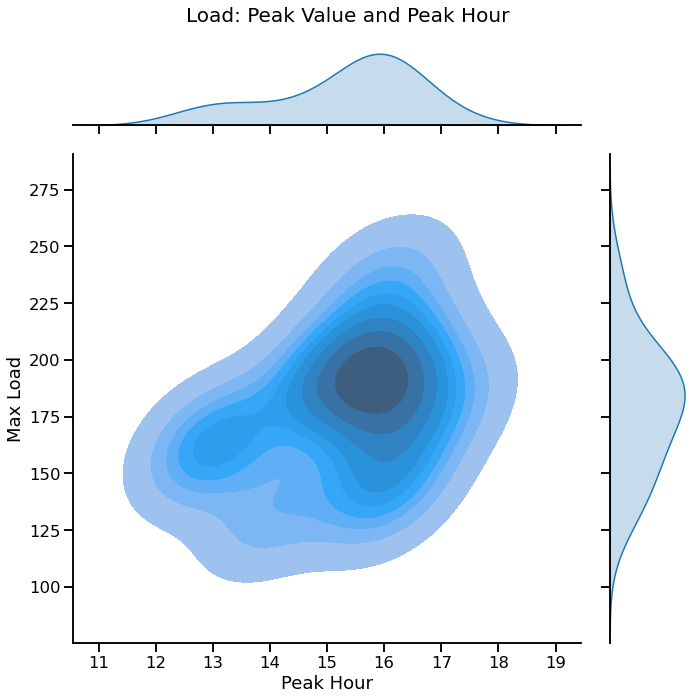

In [30]:
df_jth = df_j.loc[df_j['dow'] == 3]
df_jth['ts'] = pd.DatetimeIndex(df_jth['ts'], normalize=True)
df_jth.set_index('ts', inplace = True)

june_thurs = ['2017-06-01', '2017-06-08', '2017-06-15', '2017-06-22','2017-06-29', 
              '2018-06-07', '2018-06-14', '2018-06-21','2018-06-28', 
              '2019-06-06', '2019-06-13', '2019-06-20','2019-06-27']

df_jth_maxdf = pd.DataFrame([[df_jth.loc[dt, 'load'].idxmax().hour, df_jth.loc[dt, 'load'].max(),
                              df_jth.loc[dt, 'temp'].idxmax().hour, df_jth.loc[dt, 'temp'].max()] for dt in june_thurs],
                            columns=['maxlload_hr', 'maxload', 'maxtemp_hr', 'maxtemp'], index = june_thurs)

sns.set_context('talk')
g2 = sns.jointplot(x = 'maxlload_hr', y = 'maxload', data = df_jth_maxdf,
                   kind = 'kde', fill = True, height = 10,  palette = 'rocket_r')
g2.fig.suptitle('Load: Peak Value and Peak Hour', fontsize = 20)
g2.set_axis_labels('Peak Hour', 'Max Load')
g2.fig.tight_layout()